Generating Graph 1 (Top-Left): Regular, Price
Generating Graph 2 (Top-Right): Bushy, Price
Generating Graph 3 (Bottom-Left): Regular, Log-Price
Generating Graph 4 (Bottom-Right): Bushy, Log-Price
Combined 2x2 graphs (Regular vs. Bushy) saved as 'combined_2x2_regular_vs_bushy.png'


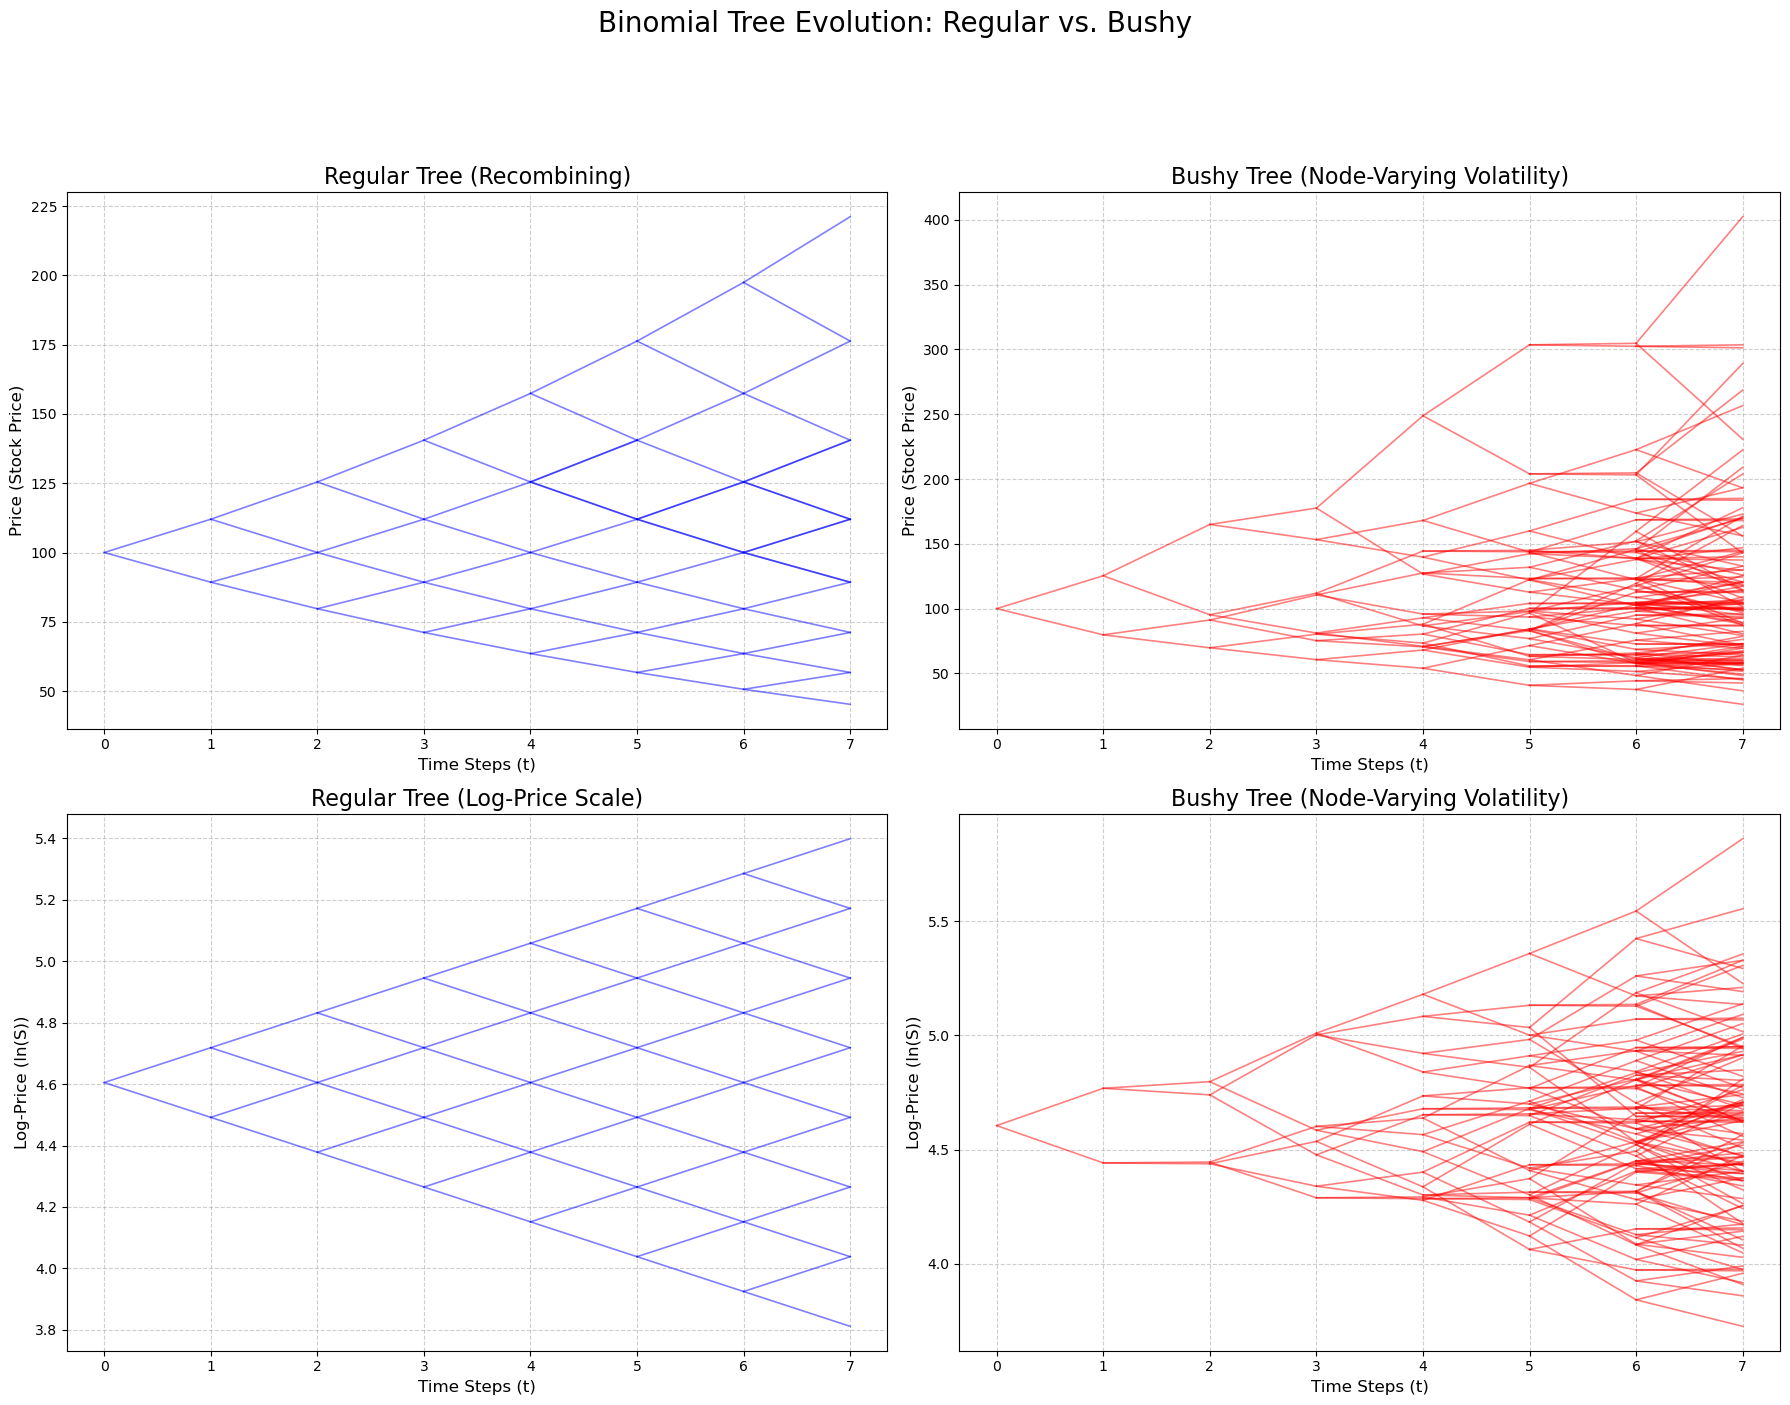

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# --- General Parameters ---
S0 = 100  # Initial Price
N = 7    # Number of time steps
T = 1.0   # Total time (1 year)
dt = T / N

# ================================================
# Create a single figure with a 2x2 grid
# ================================================
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Binomial Tree Evolution: Regular vs. Bushy', fontsize=20, y=1.03)

# ================================================
# PLOT 1 (Top-Left): Regular Tree (Price Scale)
# ================================================
# This graph is unchanged
print("Generating Graph 1 (Top-Left): Regular, Price")
ax = axes[0, 0] 
levels = [set([S0])] 

sigma_const = 0.3
u = np.exp(sigma_const * np.sqrt(dt))
d = 1 / u

for t in range(N):
    next_level = set()
    for price in levels[t]:
        price_up = price * u
        price_down = price * d
        
        next_level.add(price_up)
        next_level.add(price_down)
        
        ax.plot([t, t + 1], [price, price_up], 'b-', alpha=0.5, lw=1.2)
        ax.plot([t, t + 1], [price, price_down], 'b-', alpha=0.5, lw=1.2)
        
    levels.append(next_level) 

ax.set_title(f'Regular Tree (Recombining)', fontsize=16) 
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Price (Stock Price)', fontsize=12) 
ax.set_xticks(range(N + 1)) 
ax.grid(True, linestyle='--', alpha=0.6)

# ================================================
# PLOT 2 (Top-Right): Bushy Tree (Price Scale)
# ================================================
print("Generating Graph 2 (Top-Right): Bushy, Price")
ax = axes[0, 1] 
price_levels = [[S0]]

base_sigma = 0.3
vol_of_vol = 0.9

for t in range(N):
    next_price_level = []
    
    # *** MODIFIED HERE ***
    # Loop for each price (node) at the current time step
    for price in price_levels[t]:
        
        # Calculate a new random volatility FOR EVERY NODE
        sigma_node = base_sigma + np.random.normal(0, vol_of_vol * np.sqrt(dt))
        sigma_node = max(0.01, sigma_node) # Ensure positive vol
        u_node = np.exp(sigma_node * np.sqrt(dt))
        d_node = 1 / u_node
        
        # Calculate new prices based on this node's unique u/d
        price_up = price * u_node
        price_down = price * d_node
        
        next_price_level.append(price_up)
        next_price_level.append(price_down)
        
        ax.plot([t, t + 1], [price, price_up], 'r-', alpha=0.5, lw=1.2)
        ax.plot([t, t + 1], [price, price_down], 'r-', alpha=0.5, lw=1.2)

    price_levels.append(next_price_level) 

ax.set_title(f'Bushy Tree (Node-Varying Volatility)', fontsize=16) 
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Price (Stock Price)', fontsize=12) 
ax.set_xticks(range(N + 1)) 
ax.grid(True, linestyle='--', alpha=0.6)

# ================================================
# PLOT 3 (Bottom-Left): Regular Tree (Log-Price Scale)
# ================================================
# This graph is unchanged
print("Generating Graph 3 (Bottom-Left): Regular, Log-Price")
ax = axes[1, 0] 
log_levels = [set([np.log(S0)])] 
log_u = np.log(u) 
log_d = np.log(d)

for t in range(N):
    next_level = set()
    for log_price in log_levels[t]:
        log_price_up = log_price + log_u
        log_price_down = log_price + log_d
        
        next_level.add(log_price_up)
        next_level.add(log_price_down)
        
        ax.plot([t, t + 1], [log_price, log_price_up], 'b-', alpha=0.5, lw=1.2)
        ax.plot([t, t + 1], [log_price, log_price_down], 'b-', alpha=0.5, lw=1.2)
        
    log_levels.append(next_level) 

ax.set_title(f'Regular Tree (Log-Price Scale)', fontsize=16) 
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Log-Price (ln(S))', fontsize=12) 
ax.set_xticks(range(N + 1)) 
ax.grid(True, linestyle='--', alpha=0.6)

# ================================================
# PLOT 4 (Bottom-Right): Bushy Tree (Log-Price Scale)
# ================================================
print("Generating Graph 4 (Bottom-Right): Bushy, Log-Price")
ax = axes[1, 1] 
log_price_levels = [[np.log(S0)]]

for t in range(N):
    next_log_price_level = []
    
    # *** MODIFIED HERE ***
    # Loop for each log-price (node) at the current time step
    for log_price in log_price_levels[t]:
        
        # Calculate a new random volatility FOR EVERY NODE
        sigma_node = base_sigma + np.random.normal(0, vol_of_vol * np.sqrt(dt))
        sigma_node = max(0.01, sigma_node)
        u_node = np.exp(sigma_node * np.sqrt(dt))
        d_node = 1 / u_node
        log_u_node = np.log(u_node)
        log_d_node = np.log(d_node)
        
        # Calculate new log-prices based on this node's unique u/d
        log_price_up = log_price + log_u_node
        log_price_down = log_price + log_d_node
        
        next_log_price_level.append(log_price_up)
        next_log_price_level.append(log_price_down)
        
        ax.plot([t, t + 1], [log_price, log_price_up], 'r-', alpha=0.5, lw=1.2)
        ax.plot([t, t + 1], [log_price, log_price_down], 'r-', alpha=0.5, lw=1.2)

    log_price_levels.append(next_log_price_level) 

ax.set_title(f'Bushy Tree (Node-Varying Volatility)', fontsize=16) 
ax.set_xlabel('Time Steps (t)', fontsize=12)
ax.set_ylabel('Log-Price (ln(S))', fontsize=12) 
ax.set_xticks(range(N + 1)) 
ax.grid(True, linestyle='--', alpha=0.6)

# ================================================
# Save the single figure
# ================================================
fig.tight_layout(rect=[0, 0.03, 1, 0.96]) 
fig.savefig('combined_2x2_regular_vs_bushy.png')
print("Combined 2x2 graphs (Regular vs. Bushy) saved as 'combined_2x2_regular_vs_bushy.png'")